<a href="https://colab.research.google.com/github/b-paramesh/Logistic_Regression_Decision_Tree_Random_Forest/blob/main/Day_20_randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
[[46  6]
 [ 4 24]]


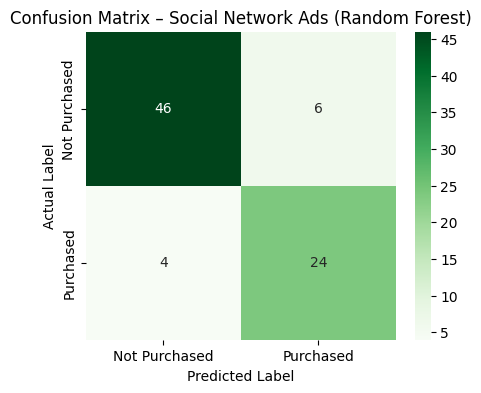

Accuracy: 0.875


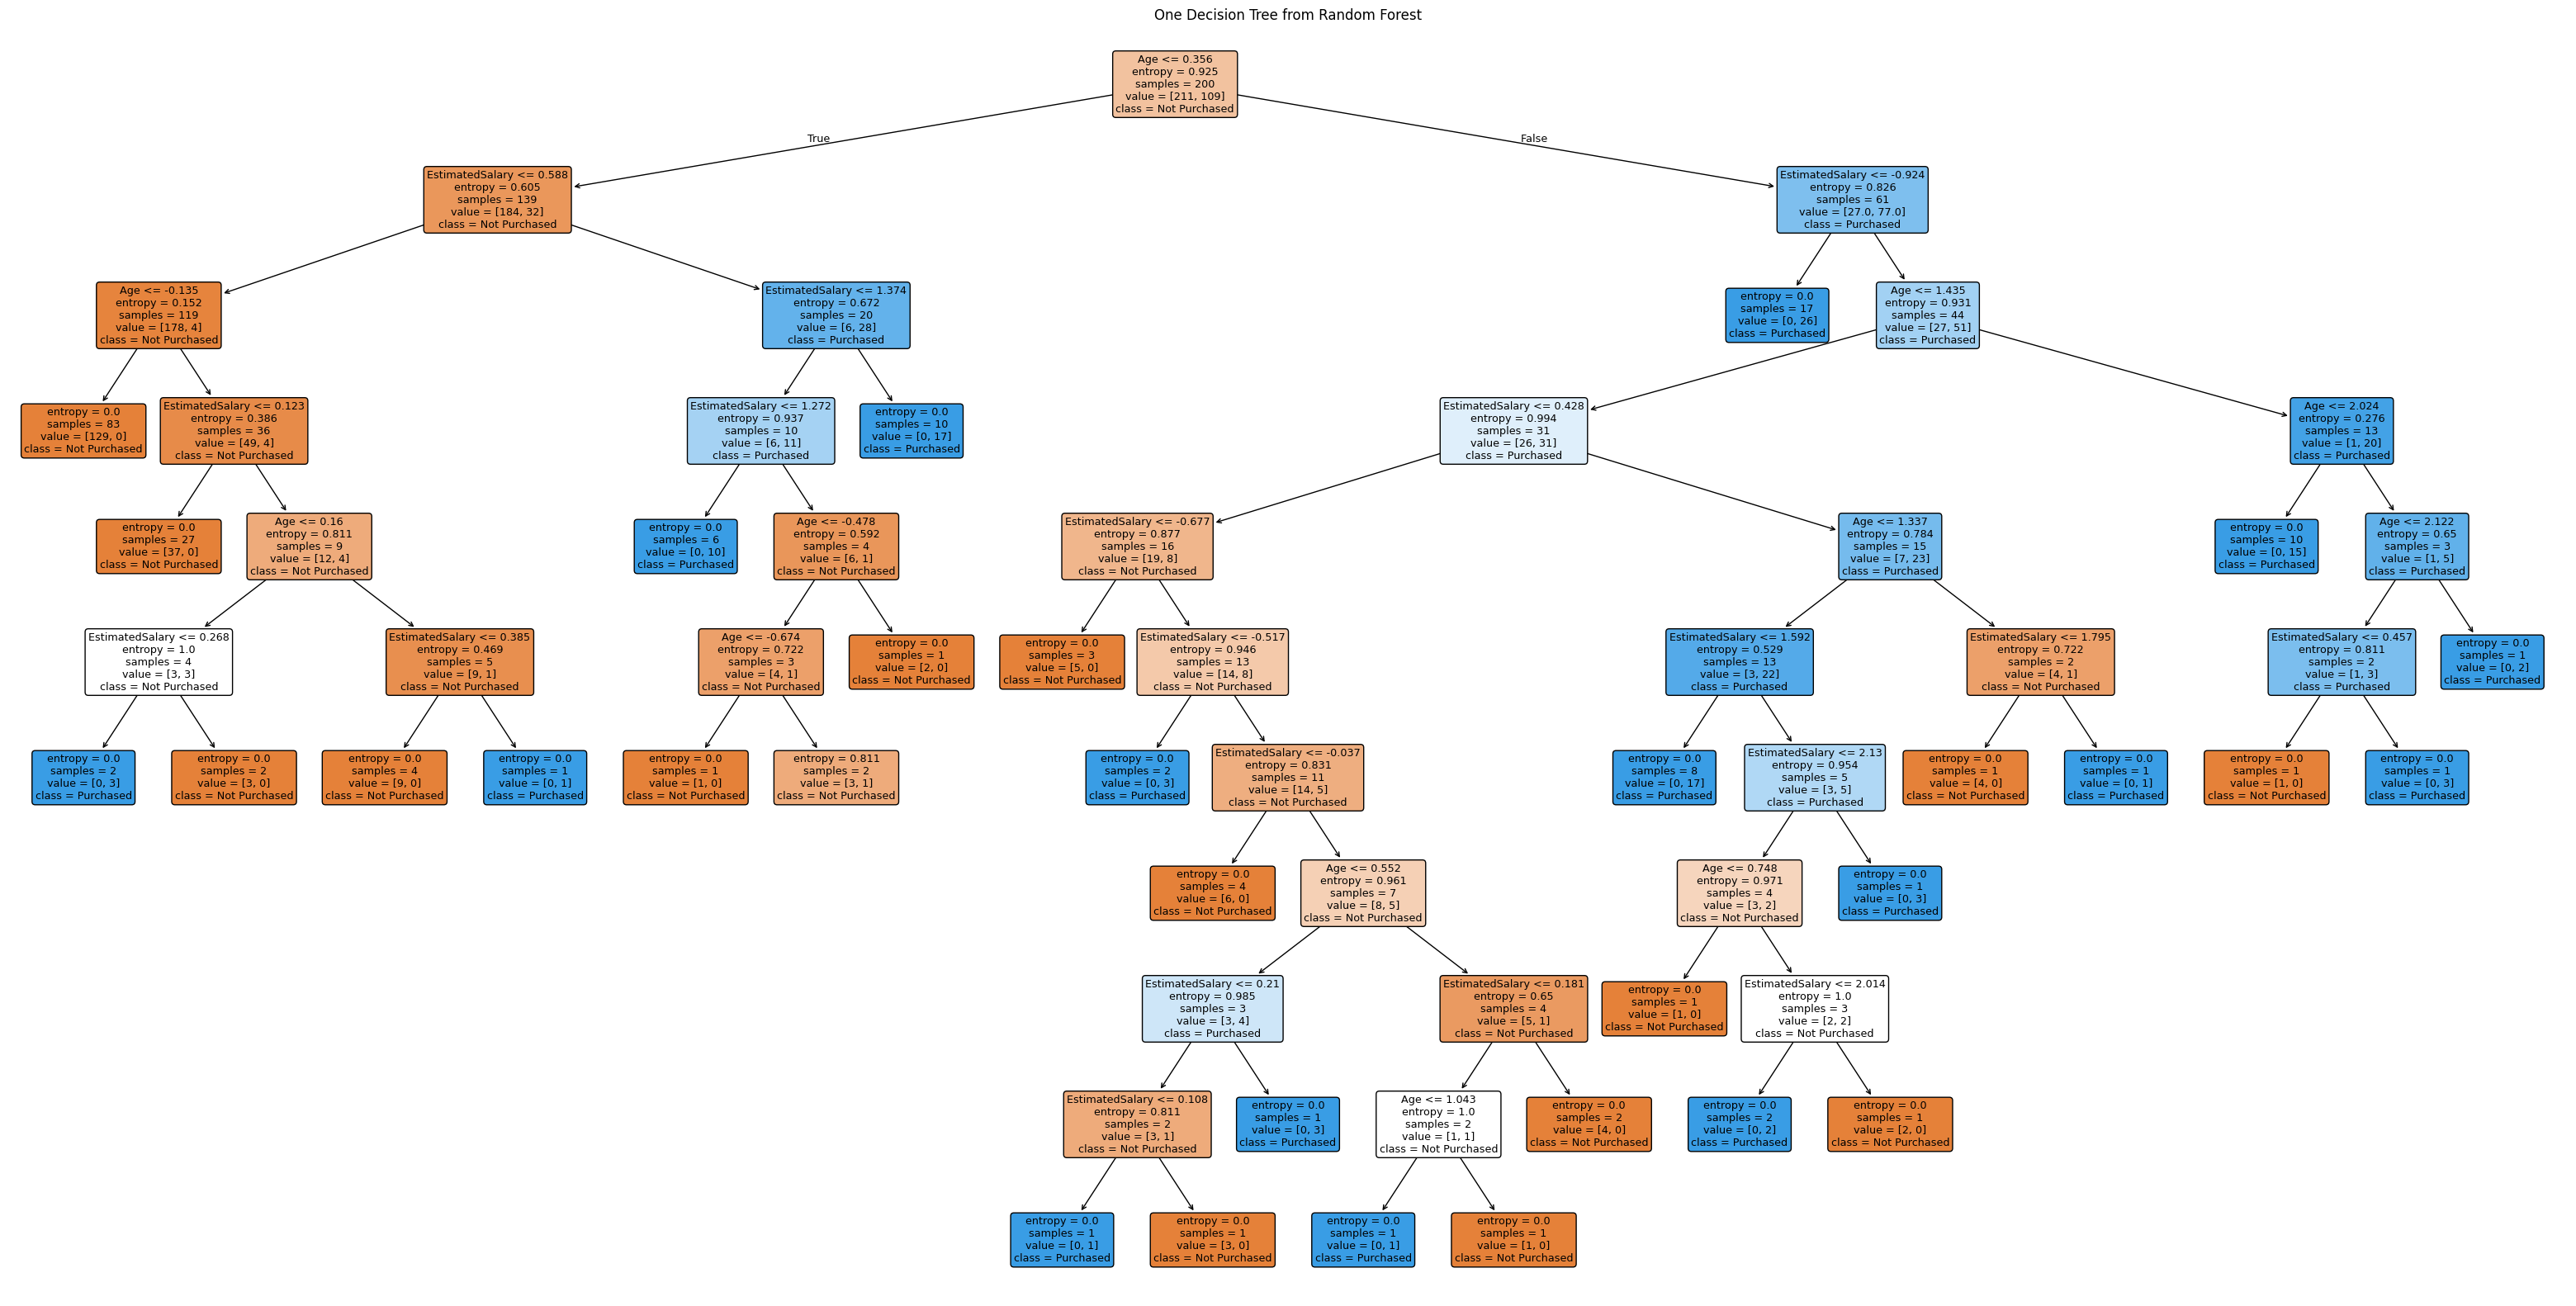

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Load dataset
path = "/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv"
df = pd.read_csv(path)
print(df.head())

# Features and target
X = df.iloc[:, 2:4].values
y = df.iloc[:, -1].values

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ===============================
# RANDOM FOREST CLASSIFIER
# ===============================
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(
    n_estimators=100,
    criterion="entropy",
    random_state=0
)

classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)

# Confusion Matrix & Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['Not Purchased', 'Purchased'],
    yticklabels=['Not Purchased', 'Purchased']
)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix – Social Network Ads (Random Forest)')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))

# ===============================
# VISUALIZE ONE TREE FROM FOREST
# ===============================
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20))
plot_tree(
    classifier.estimators_[0],  # one tree from the forest
    filled=True,
    rounded=True,
    feature_names=['Age', 'EstimatedSalary'],
    class_names=['Not Purchased', 'Purchased']
)
plt.title("One Decision Tree from Random Forest")
plt.show()
